# # Stock Market Prediction And Forecasting Using Stacked LSTM

# By: Ritesh Dhakad

# Import required libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


# Load and read the data

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Data understanding

In [4]:
df.shape


(2035, 8)

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


# Statistical Information

In [7]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


 1.Average stockprice of TATAGlobal is 149 Rupees
 
 2.Maximum Stockprice is 325 Rupees and Minimum Stockprice is 80 Rupees.
 
 3.Maximum Trade Quantity is 29M and Minimum Trade Quantity is 2.33M.
 
 4.Maximum Turnover is 55,755 Lakhs, and minimum Turnover is 37 lakhs.


# Sort the Date by Ascending

In [9]:
df=df.sort_values(by='Date', ignore_index=True)
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Exploratory Data Analaysis

In [10]:
df.Date.dtype

dtype('O')



Convert Date columns data type fron Object to Datetime format

In [11]:
df['Date']=pd.to_datetime(df['Date'])
print(df.Date.dtype)


datetime64[ns]


 
 
 How many Days Stock Data we have?

In [12]:
print("Starting Date:", df.Date.min())
print("Last Date:", df.Date.max())
print("Number of Days:", (df.Date.max()-df.Date.min()))

Starting Date: 2010-07-21 00:00:00
Last Date: 2018-09-28 00:00:00
Number of Days: 2991 days 00:00:00


# For 2991 Days of Stock Data we have, Including saturday and sunday.

# TATAGlobal Stock Price Analaysis


In [14]:
 figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"],
                                        high=df["High"],
                                        low=df["Low"],
                                        close=df["Close"])])
figure.update_layout(title = "TATAGlobal Stock Price Analysis",
                     xaxis_rangeslider_visible=False)
figure.show()

 1.From 2011 to 2017 Stock Price of TATAGlobal is almost constant.
 
 2.From start of the 2017 the Stock price increased rapidly.
 
 3.TATAGlobal stock price is high in Start of 2018.
 
 4.After the Start of 2018 the stock price decreasing.


# Stock Analysis by Perticular period

In [15]:
figure = px.line(df, x='Date', y='Close', 
                 title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()



 
 For Further Analysis we have to choose any one column between Open, Close, High, Low, Here i am selecting Close column and Data column.

In [16]:
data=df[['Date','Close']]
data.head()


,Date,Close
0,2010-07-21,121.55
1,2010-07-22,120.90
2,2010-07-23,120.65
3,2010-07-26,117.60
4,2010-07-27,118.65


# Time Series Forescasting

 Stock Price contains trend and seasonality, so we are going to use Holt winters method, ARIMA & SARIMA.

 To Run Time series method we have to set Date to Index

In [17]:
data.set_index('Date', inplace=True)
time_series=data[['Close']]
time_series.head()


,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65


As we know that the stock prices depends on recent historical data and current situations so Lets choose only 1 year of historical data.

In [18]:
ts=time_series[-365:]

 Split data into training and testing set

In [19]:
len(ts)

365

Lets Select 335 Data Points as training and Rest are testing set.

In [20]:
train=ts[:335]
test=ts[335:]
print("Training Data Points:", len(train), "Testing DataPoints:", len(test))


Training Data Points: 335 Testing DataPoints: 30




#Holt's Winters Additive Method

In [21]:
warnings.filterwarnings('ignore')

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model=ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add')
model=model.fit(optimized=True)
forecast=model.forecast(len(test))
forecast.index=test.index
forecast[20:]


/Users/rittudhakad/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/rittudhakad/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Date
2018-09-14    240.655351
2018-09-17    240.705416
2018-09-18    241.178622
2018-09-19    240.630421
2018-09-21    240.663739
2018-09-24    242.956394
2018-09-25    242.915281
2018-09-26    242.984828
2018-09-27    243.938362
2018-09-28    243.741979
dtype: float64



#Plot Train Test and Forecasted values

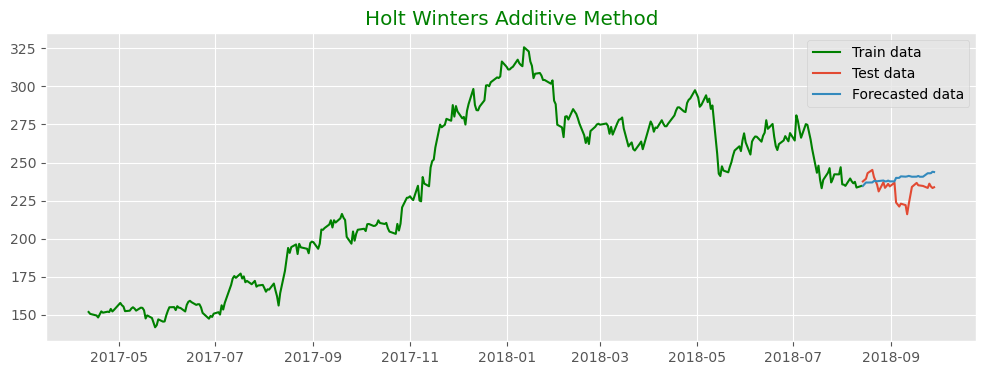

In [23]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train data', color='green')
plt.plot(test, label='Test data')
plt.plot(forecast, label='Forecasted data')
plt.legend()
plt.title('Holt Winters Additive Method', color='green');

# Evaluating the Model

In [24]:
from sklearn.metrics import mean_squared_error as mse,  mean_absolute_percentage_error as mape, r2_score

rmse=np.sqrt(mse(test,forecast)).round(2)
mpe=mape(test, forecast).round(2)*100
result=pd.DataFrame({'Method':'Holt Winters Add Method', 'RMSE':[rmse], 'MAPE':[mpe]})
result


,Method,RMSE,MAPE
0,Holt Winters Add Method,10.62,4.0


# R2 Score is Negative so not best method to forecast for stock price.

 2. Holts Winters Multiplicative method

In [26]:
model=ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='mul')
model=model.fit(optimized=True)
forecast=model.forecast(len(test))
forecast.index=test.index
forecast[20:]


/Users/rittudhakad/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/rittudhakad/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Date
2018-09-14    240.295576
2018-09-17    240.444800
2018-09-18    240.923786
2018-09-19    240.568109
2018-09-21    240.524024
2018-09-24    242.601404
2018-09-25    242.440973
2018-09-26    242.518661
2018-09-27    243.720068
2018-09-28    243.558251
dtype: float64

#Plot train, test adn forecasted values

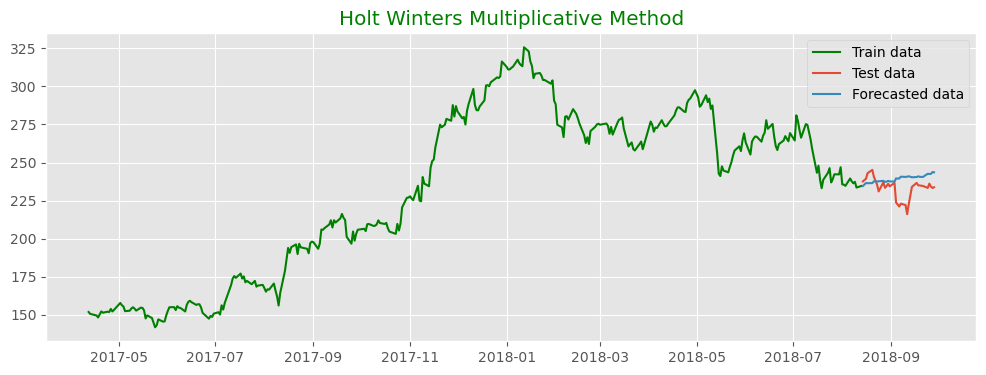

In [27]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train data', color='green')
plt.plot(test, label='Test data')
plt.plot(forecast, label='Forecasted data')
plt.legend()
plt.title('Holt Winters Multiplicative Method', color='green');


#Evaluation of model


In [28]:
rmse=np.sqrt(mse(test,forecast)).round(2)
mpe=mape(test, forecast).round(2)*100
mul_result=pd.DataFrame({'Method':'Holt Winters Mul Method', 'RMSE':[rmse], 'MAPE':[mpe]})
result=pd.concat([result,mul_result])
result



,Method,RMSE,MAPE
0,Holt Winters Add Method,10.62,4.0
0,Holt Winters Mul Method,10.45,4.0




#RMSE, MAPE are lower than Additive method.




3. ARIMA

#Check Trend and Seasonality

<Figure size 640x480 with 0 Axes>

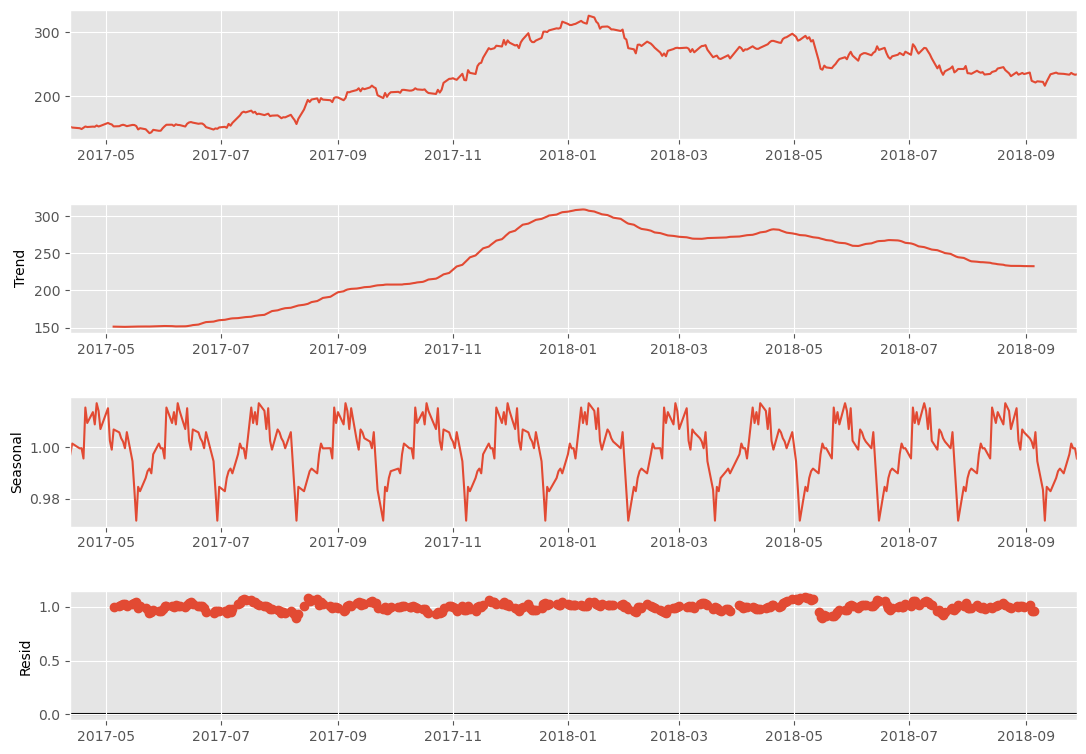

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(ts, 
                            model='multiplicative', period=30)
fig = plt.figure()  
fig = decompose.plot()  
fig.set_size_inches(12, 8)



#Time Series contains Seasonality of 3 Months.

#ACF & PACF to see the p,q,d values

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

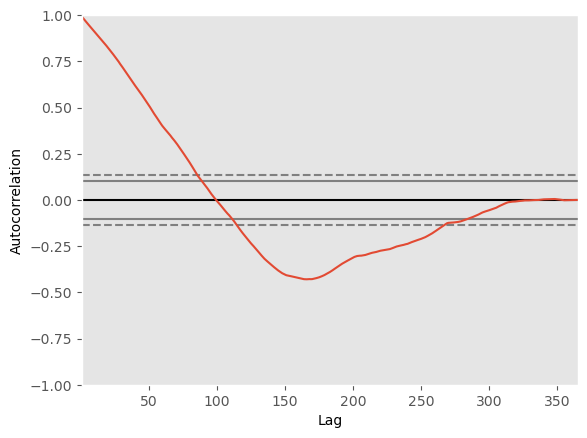

In [30]:
pd.plotting.autocorrelation_plot(ts)

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

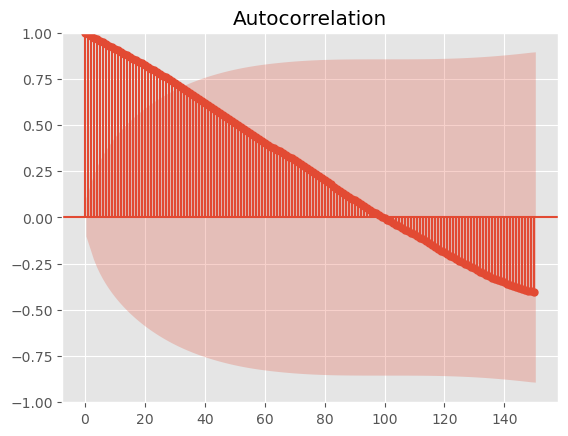

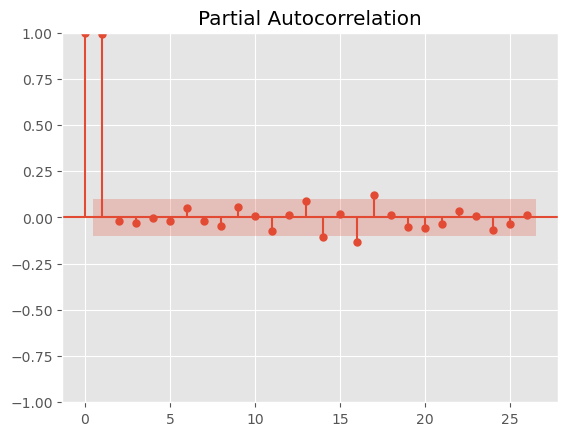

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts, lags=150), plot_pacf(ts)


In [32]:
import statsmodels.api as sm

model=sm.tsa.arima.ARIMA(train, order=(1,1,1))
model=model.fit()
forecast=model.forecast(len(test))
forecast.index=test.index
forecast[20:]


/Users/rittudhakad/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/rittudhakad/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/rittudhakad/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/rittudhakad/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Date
2018-09-14    234.547948
2018-09-17    234.547948
2018-09-18    234.547948
2018-09-19    234.547948
2018-09-21    234.547948
2018-09-24    234.547948
2018-09-25    234.547948
2018-09-26    234.547948
2018-09-27    234.547948
2018-09-28    234.547948
Name: predicted_mean, dtype: float64

In [33]:
rmse=np.sqrt(mse(test, forecast)).round(2)
rmse


7.11

#RMSE is lower than above two methods, lets select best for value of p,d,q to lower than RMSE.


In [34]:
warnings.filterwarnings('ignore')

import itertools
p=range(0,8)
q=range(0,8)
d=range(0,2)
pdq=list(itertools.product(p,d,q))
len(pdq)

128

In [35]:
rmse=[]
order1=[]
for pdq in pdq:
    try:
        model=sm.tsa.arima.ARIMA(train, order=pdq).fit()
        pred=model.predict(start=len(train), end=len(ts)-1)
        error=np.sqrt(mse(pred,test))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue


In [36]:
order=pd.DataFrame(data=rmse, index=order1, columns=['RMSE'])
order.head()


,RMSE
"(0, 0, 0)",6.862106
"(0, 0, 1)",7.185782
"(0, 0, 2)",7.011213
"(0, 0, 3)",6.590085
"(0, 0, 4)",6.255617


In [37]:
pd.pivot_table(order, values='RMSE', index=order.index, aggfunc=min).sort_values(by='RMSE', ascending=True)[:5].round(2)



,RMSE
"(0, 0, 4)",6.26
"(5, 1, 7)",6.57
"(0, 0, 3)",6.59
"(5, 1, 5)",6.60
"(5, 0, 0)",6.60


#Using p=0, d=0, q=4 train the ARIMA model.

In [38]:
arima=sm.tsa.arima.ARIMA(train, order=(0,0,4))
arima_fit=arima.fit()
forecast=arima_fit.forecast(len(test))
forecast.index=test.index
forecast


Date
2018-08-14    238.117316
2018-08-16    236.698065
2018-08-17    235.700923
2018-08-20    238.611538
2018-08-21    232.507375
2018-08-23    232.507375
2018-08-24    232.507375
2018-08-27    232.507375
2018-08-28    232.507375
2018-08-29    232.507375
2018-08-30    232.507375
2018-08-31    232.507375
2018-09-03    232.507375
2018-09-04    232.507375
2018-09-05    232.507375
2018-09-06    232.507375
2018-09-07    232.507375
2018-09-10    232.507375
2018-09-11    232.507375
2018-09-12    232.507375
2018-09-14    232.507375
2018-09-17    232.507375
2018-09-18    232.507375
2018-09-19    232.507375
2018-09-21    232.507375
2018-09-24    232.507375
2018-09-25    232.507375
2018-09-26    232.507375
2018-09-27    232.507375
2018-09-28    232.507375
Name: predicted_mean, dtype: float64

#Plot train, test and forecasted values

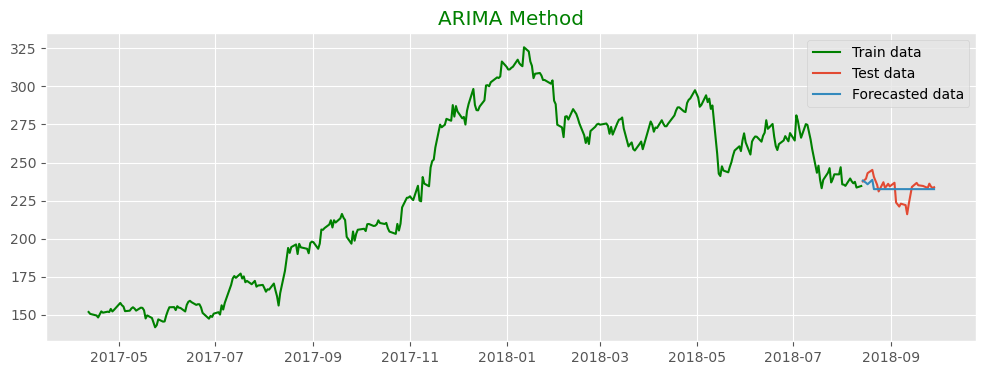

In [40]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train data', color='green')
plt.plot(test, label='Test data')
plt.plot(forecast, label='Forecasted data')
plt.legend()
plt.title('ARIMA Method', color='green');


# Evaluation of model

In [41]:
rmse=np.sqrt(mse(test,forecast)).round(2)
mpe=mape(test, forecast).round(2)*100
arima_result=pd.DataFrame({'Method':'ARIMA', 'RMSE':[rmse], 'MAPE':[mpe]})
result=pd.concat([result,arima_result])
result



,Method,RMSE,MAPE
0,Holt Winters Add Method,10.62,4.0
0,Holt Winters Mul Method,10.45,4.0
0,ARIMA,6.26,2.0



#RMSE and MAPE are lower than both Holt winters additive and multiplicative methods.

#4.SARIMA

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model=model.fit()
forecast=model.forecast(len(test))
forecast.index=test.index
forecast[20:]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15340D+00    |proj g|=  5.40046D-02

At iterate    5    f=  3.02807D+00    |proj g|=  2.06317D-02


 This problem is unconstrained.



At iterate   10    f=  3.02695D+00    |proj g|=  1.24234D-02

At iterate   15    f=  3.02583D+00    |proj g|=  1.17839D-03

At iterate   20    f=  3.02575D+00    |proj g|=  7.89885D-05

At iterate   25    f=  3.02575D+00    |proj g|=  7.00987D-04

At iterate   30    f=  3.02573D+00    |proj g|=  4.33936D-04

At iterate   35    f=  3.02573D+00    |proj g|=  4.31437D-05

At iterate   40    f=  3.02573D+00    |proj g|=  3.43630D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     46      1     0     0   3.436D-05   3.026D+00
  F =   3.0257277971837686     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

Date
2018-09-14    241.073473
2018-09-17    241.125748
2018-09-18    241.588660
2018-09-19    241.045633
2018-09-21    241.066681
2018-09-24    243.362594
2018-09-25    243.312087
2018-09-26    243.410422
2018-09-27    244.370535
2018-09-28    244.171387
Name: predicted_mean, dtype: float64




#Plot train, test and forecasted values


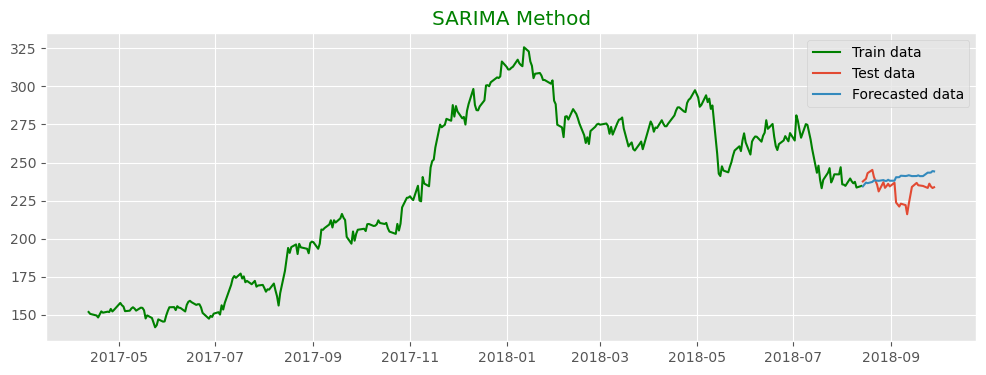

In [43]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train data', color='green')
plt.plot(test, label='Test data')
plt.plot(forecast, label='Forecasted data')
plt.legend()
plt.title('SARIMA Method', color='green');





#Evaluation of model

In [44]:
rmse=np.sqrt(mse(test,forecast)).round(2)
mpe=mape(test, forecast).round(2)*100
sarima_result=pd.DataFrame({'Method':'SARIMA', 'RMSE':[rmse], 'MAPE':[mpe]})
result=pd.concat([result,sarima_result])
result



,Method,RMSE,MAPE
0,Holt Winters Add Method,10.62,4.0
0,Holt Winters Mul Method,10.45,4.0
0,ARIMA,6.26,2.0
0,SARIMA,10.92,4.0


#ARIMA is the best algorithm to forecast the TATAGlobal's stocks price

#Forecast TATAGlobal's stock price using Stacked LSTM.

In [45]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Preparing the data

.The LSTM model will need data input in the form of X Vs y. Where the X will represent the last N day’s(15) prices and y will represent the N+1th day (16th-day) price.

.Since LSTM is a Neural network-based algorithm, standardizing or normalizing the data is mandatory for a fast and more accurate fit.

In [46]:
ts.head()

,Close
Date,
2017-04-12,151.75
2017-04-13,150.50
2017-04-17,149.45
2017-04-18,148.15
2017-04-19,150.20


In [47]:
from sklearn.preprocessing import MinMaxScaler


In [48]:
scaler=MinMaxScaler()
scaler=scaler.fit(ts)
ts=scaler.transform(ts)
ts[:5]


array([[0.05460473],
       [0.04781309],
       [0.04210812],
       [0.03504482],
       [0.0461831 ]])

# Preparing Data for LSTM

#Split into Samples X and Y(Input X output Y)

In [49]:
x=[]
y=[]
no_of_rows=len(ts)

#next day's Price Prediction is based on last how many past day's prices

In [50]:
time_step=15


#iterate through values to create combination

In [51]:
for i in range(time_step, no_of_rows, 1):
    x0=ts[i-time_step:i]
    y0=ts[i]
    x.append(x0)
    y.append(y0)


#reshape the input to a 3D (no_of_sample, time_step, features)

In [52]:
x_data=np.array(x)
x_data=x_data.reshape(x_data.shape[0], x_data.shape[1], 1)
print("x data shape :", x_data.shape)

x data shape : (350, 15, 1)




#reshape the output to 2D as it is supposed to single column

In [53]:
y_data=np.array(y)
y_data=y_data.reshape(y_data.shape[0],1)
print("y data shape: ", y_data.shape)


y data shape:  (350, 1)


# Split the data into train and test

.Keeping last few days of data to test abd the learnings of the model and rest for training the model.

.Here I am choosing Last 30 days as testin




#choose number of testing data rows

In [54]:
test_rows=30

#split data into train & test

In [55]:
x_train=x_data[: - test_rows]
x_test=x_data[- test_rows:]
y_train=y_data[: - test_rows]
y_test=y_data[- test_rows:]
print("x train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y test shape: ", y_test.shape)


x train shape:  (320, 15, 1)
y_train shape:  (320, 1)
x_test shape:  (30, 15, 1)
y test shape:  (30, 1)


# Creating the Deep Learning LSTM model


.Use the LSTM function instead of Dense to define the hidden
layers.

.The output layer has one neuron as we are predicting the next day price.

# Defining Input shapes for LSTM

In [56]:
time_step=x_train.shape[1]
tot_feature=x_train.shape[2]
print("Number of TimeSteps:", time_step)
print("Number of Features:", tot_feature)


Number of TimeSteps: 15
Number of Features: 1


# Initialising the RNN

In [57]:
model = Sequential()

#Adding the First input hidden layer and the LSTM layer

#return_sequences = True, means the output of every time step to be shared with hidden next layer.

In [58]:
model.add(LSTM(units = 10, activation = 'relu', input_shape = (time_step, tot_feature), return_sequences=True))

#Adding the Second Second hidden layer and the LSTM layer

In [59]:
model.add(LSTM(units = 5, activation = 'relu', input_shape = (time_step, tot_feature), return_sequences=True))

#Adding the Second Third hidden layer and the LSTM layer

In [60]:
model.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))

#Adding the output layer

In [61]:
model.add(Dense(units = 1))

# Compiling the RNN

In [62]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [63]:
import time
# Measuring the time taken by the model to train
start_time=time.time()

#Fitting the RNN to the Training set

In [64]:
model.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.3325
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2690
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1485
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 13/100
32/32 [=================

In [65]:
end_time=time.time()
print("Total Time Taken: ", round((end_time-start_time)/60), 'Minutes')


Total Time Taken:  1 Minutes


# Making predictions on test data

In [66]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

1/1 [==============================] - 0s 139ms/step


# Getting the original price values for testing data

In [67]:
act=y_test
act=scaler.inverse_transform(y_test)

#Accuracy of the predictions

In [68]:
print('Accuracy:', 100 - (100*(abs(act-pred)/act)).mean())
print('RMSE:', np.sqrt(mse(act,pred)))

Accuracy: 97.94096607418881
RMSE: 6.352328224847293


In [69]:
rmse=np.sqrt(mse(act,pred)).round(2)
mpe=mape(act, pred).round(2)*100
lstm_result=pd.DataFrame({'Method':'LSTM', 'RMSE':[rmse], 'MAPE':[mpe]})
result=pd.concat([result,lstm_result])
result


,Method,RMSE,MAPE
0,Holt Winters Add Method,10.62,4.0
0,Holt Winters Mul Method,10.45,4.0
0,ARIMA,6.26,2.0
0,SARIMA,10.92,4.0
0,LSTM,6.35,2.0


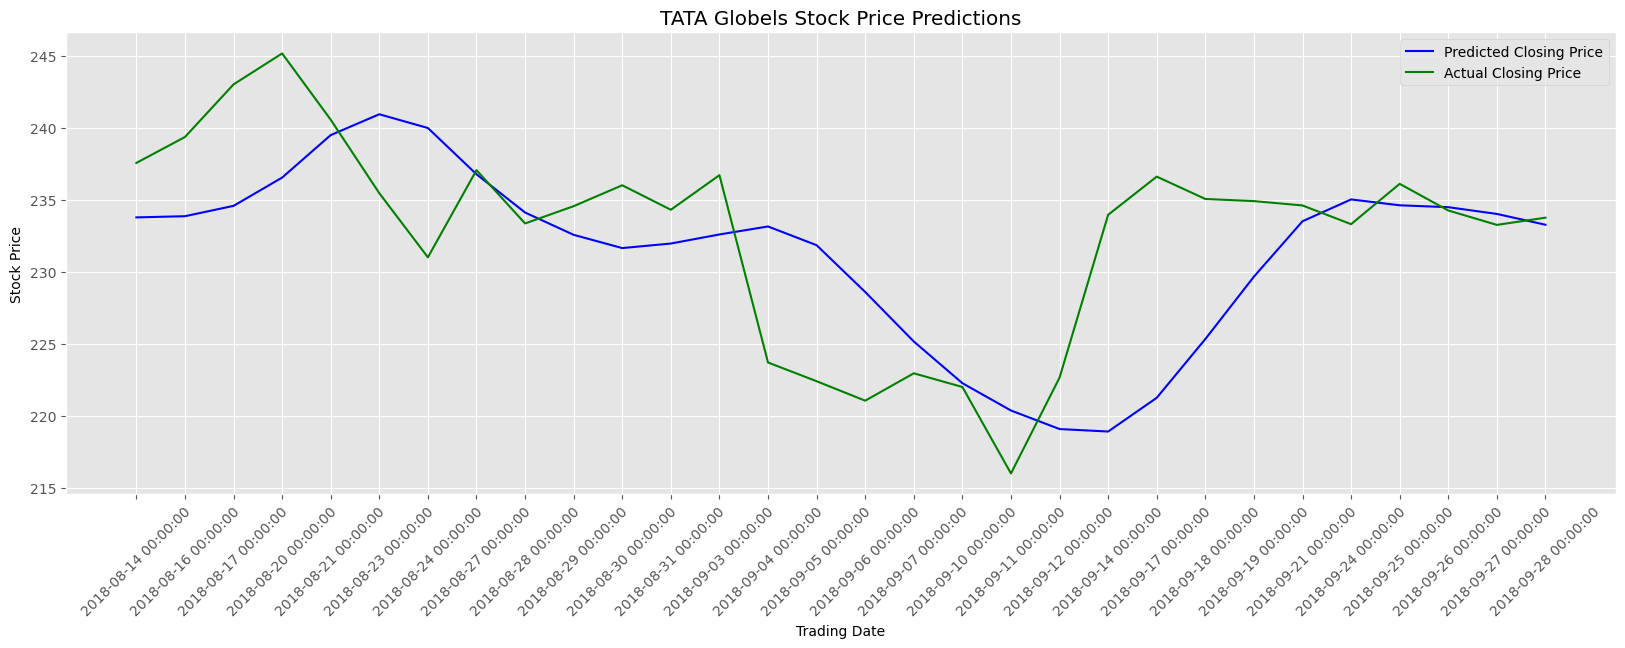

In [70]:
plt.plot(pred, color = 'blue', label = 'Predicted Closing Price')
plt.plot(act, color = 'green', label = 'Actual Closing Price')
 
plt.title('TATA Globels Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(test_rows), data.tail(test_rows).index, rotation=45)
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()


# LSTM is best model to predict the TATA Global's Stock Price.